In [115]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# For plotting decision boundaries
from sklearn.inspection import DecisionBoundaryDisplay

In [116]:
# Read in the data
df = pd.read_csv("Credit.csv", index_col=0)

# For Problem a), create HighIncome variable and drop Income
df["HighIncome"] = (df["Income"] > 50).astype(int)
df = df.drop("Income", axis=1)

# Define the list of continuous predictors
continuous_features = ["Limit", "Rating", "Age", "Education", "Balance"]

# For Problem b), the target variable is 'Cards' (Number of credit cards)

In [117]:
# Compute correlation with the target variable
correlations = df[continuous_features + ["HighIncome"]].corr()
print(correlations["HighIncome"].sort_values(ascending=False))

# Compute correlation with the target variable
correlations = df[continuous_features + ["Cards"]].corr()
print(correlations["Cards"].sort_values(ascending=False))

HighIncome    1.000000
Limit         0.634231
Rating        0.628991
Balance       0.349252
Age           0.166677
Education    -0.023899
Name: HighIncome, dtype: float64
Cards        1.000000
Balance      0.086456
Rating       0.053239
Age          0.042948
Limit        0.010231
Education   -0.051084
Name: Cards, dtype: float64


In [118]:
# Prepare features and target
X = df[continuous_features]
y = df["HighIncome"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Fit the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values("Importance", ascending=False)
print(importance_df)

     Feature  Importance
0      Limit    0.336605
1     Rating    0.273058
4    Balance    0.242642
2        Age    0.100350
3  Education    0.047346


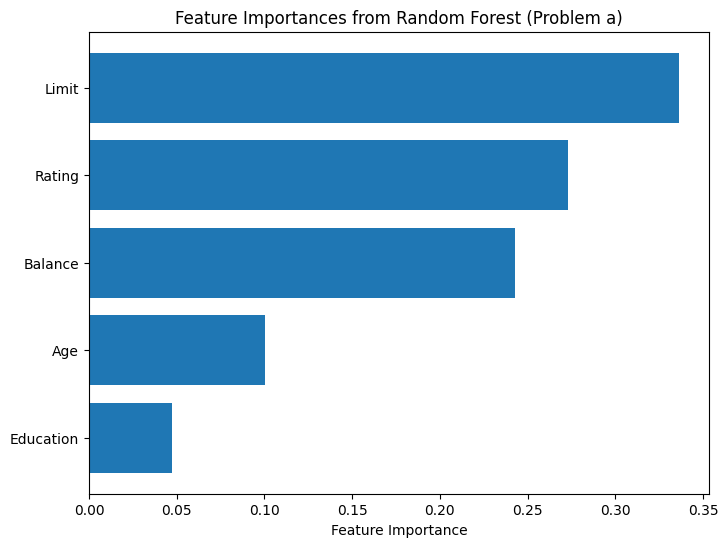

In [119]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Feature Importances from Random Forest (Problem a)")
plt.show()

In [120]:
from sklearn.ensemble import RandomForestRegressor

# Prepare features and target
X = df[continuous_features]
y = df["Cards"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values("Importance", ascending=False)
print(importance_df)

     Feature  Importance
0      Limit    0.237795
1     Rating    0.214527
4    Balance    0.207551
2        Age    0.178558
3  Education    0.161569


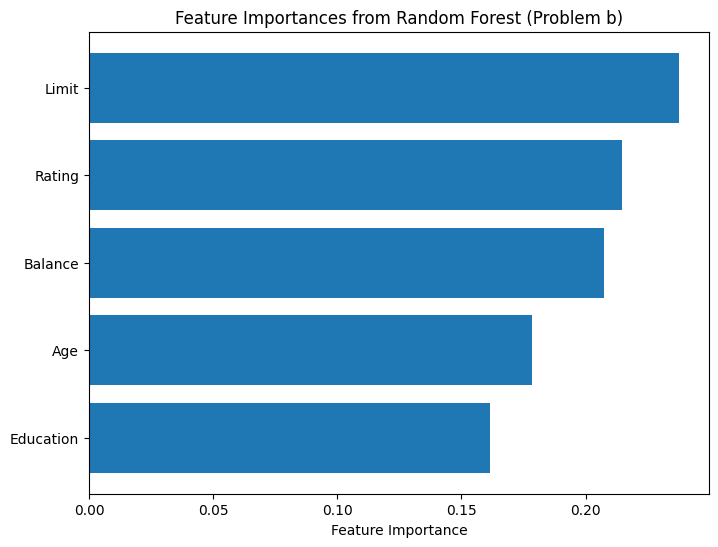

In [121]:
# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Feature Importances from Random Forest (Problem b)")
plt.show()

In [122]:
# Read in the data
df = pd.read_csv("Credit.csv", index_col=0)

# Display the first few rows of the dataset
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [123]:
# Create HighIncome indicator variable
df["HighIncome"] = (df["Income"] > 50).astype(int)

# Remove the original Income variable
df = df.drop("Income", axis=1)

In [124]:
# Features and target
X_a = df[["Limit", "Rating"]]
y_a = df["HighIncome"]

In [125]:
# Split into training and test sets
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(
    X_a, y_a, test_size=0.4, random_state=42
)

In [126]:
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("KNN (k=5)", KNeighborsClassifier(n_neighbors=5)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
]

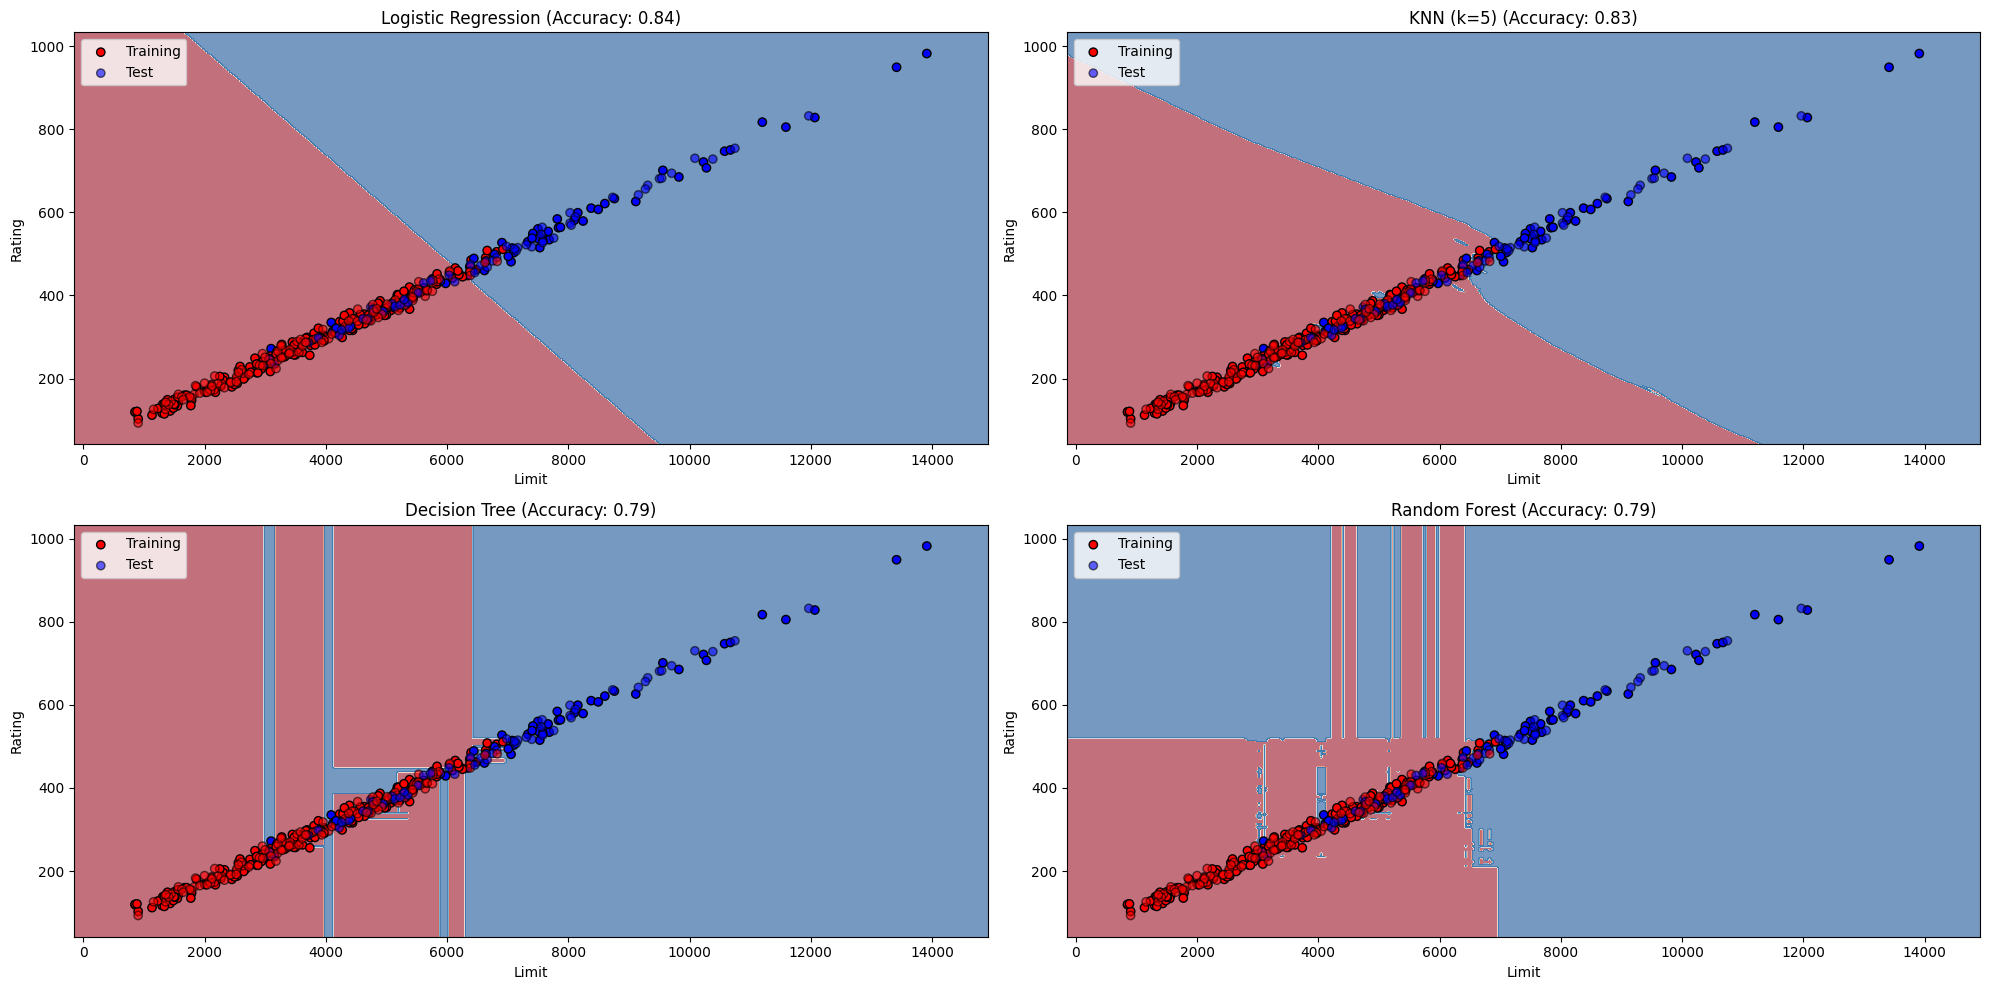

In [127]:
# Define the color maps
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_a["Limit"].min() - 1000, X_a["Limit"].max() + 1000
y_min, y_max = X_a["Rating"].min() - 50, X_a["Rating"].max() + 50
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Plot the decision boundaries
plt.figure(figsize=(20, 10))

for idx, (name, clf) in enumerate(classifiers):
    ax = plt.subplot(2, 2, idx + 1)

    # Create a pipeline with scaling
    model = make_pipeline(StandardScaler(), clf)
    model.fit(X_train_a, y_train_a)
    score = model.score(X_test_a, y_test_a)

    # Prepare the grid as a DataFrame with feature names
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_df = pd.DataFrame(grid, columns=X_a.columns)

    # Plot decision boundary
    DecisionBoundaryDisplay.from_estimator(
        model, X=grid_df, grid_resolution=500,
        response_method="predict", cmap=cm, alpha=0.6, ax=ax
    )

    # Plot training and test points
    ax.scatter(
        X_train_a["Limit"],
        X_train_a["Rating"],
        c=y_train_a,
        cmap=cm_bright,
        edgecolors="k",
        label="Training",
    )
    ax.scatter(
        X_test_a["Limit"],
        X_test_a["Rating"],
        c=y_test_a,
        cmap=cm_bright,
        edgecolors="k",
        alpha=0.6,
        label="Test",
    )

    ax.set_xlabel("Limit")
    ax.set_ylabel("Rating")
    ax.set_title(f"{name} (Accuracy: {score:.2f})")
    ax.legend()

plt.tight_layout()
plt.show()

In [128]:
# Features and target
X_b = df[["Limit", "Rating"]]
y_b = df["Cards"]  # Number of credit cards

In [129]:
# Check the distribution of 'Cards'
print(y_b.value_counts())

Cards
2    115
3    111
4     72
1     51
5     34
6     11
7      4
8      1
9      1
Name: count, dtype: int64


In [130]:
# Combine classes with counts less than 20 into '6+'
counts = y_b.value_counts()
y_b_modified = y_b.apply(lambda x: str(x) if counts[x] >= 20 else "6+")

# Update y_b
y_b = y_b_modified

In [131]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_b_encoded = label_encoder.fit_transform(y_b)

In [132]:
# Split into training and test sets
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_b, y_b_encoded, test_size=0.4, random_state=42
)

In [ ]:
classifiers_b = [
    (
        "Logistic Regression",
        Pipeline(
            [
                ("scaler", StandardScaler()),
                (
                    "classifier",
                    LogisticRegression(max_iter=1000),
                ),
            ]
        )
    ),
    ("Decision Tree", DecisionTreeClassifier()),
    (
        "Decision Tree (depth=3)", DecisionTreeClassifier(max_depth=3)
    ),
    (
        "Random Forest",
        RandomForestClassifier(n_estimators=100, class_weight="balanced"),
    ),
]

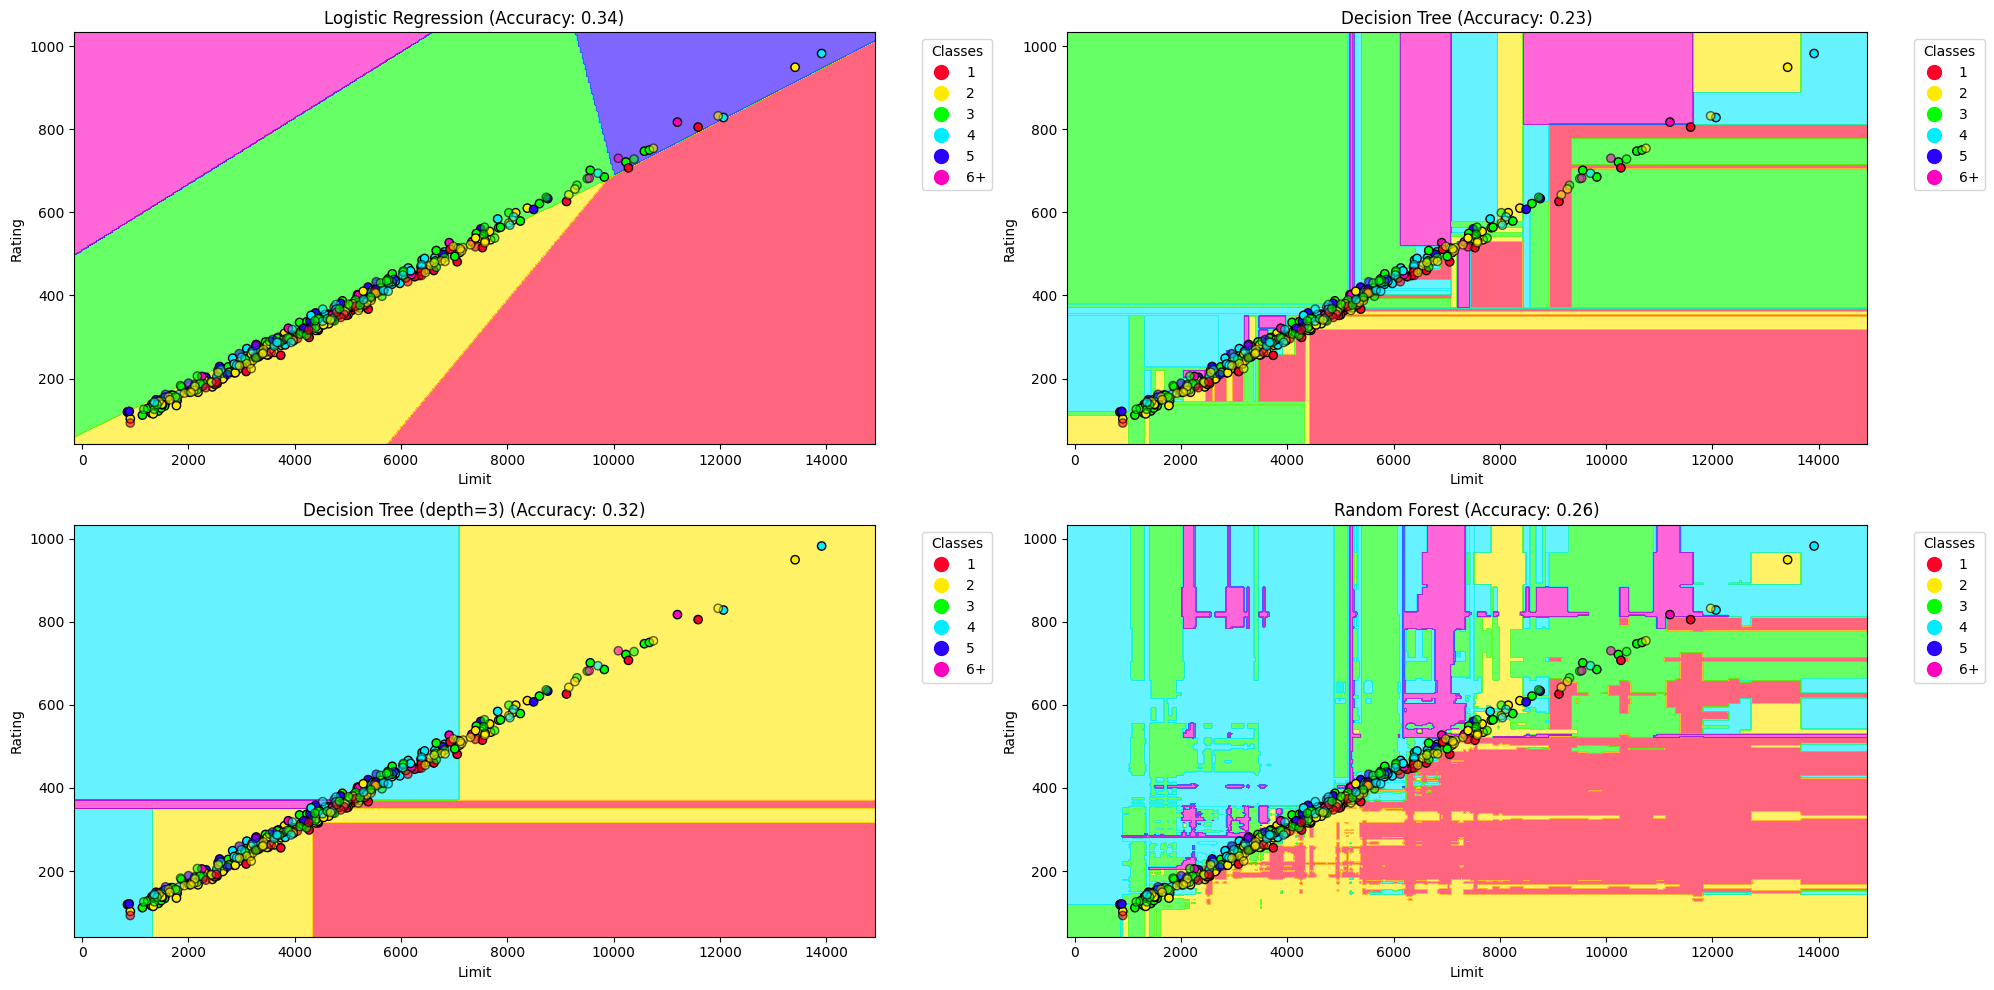

In [134]:
# Define the color maps for multiple classes
n_classes = len(np.unique(y_b_encoded))
cm = plt.get_cmap("gist_rainbow", n_classes)
cm_bright = ListedColormap([cm(i) for i in range(n_classes)])

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_b["Limit"].min() - 1000, X_b["Limit"].max() + 1000
y_min, y_max = X_b["Rating"].min() - 50, X_b["Rating"].max() + 50
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Plot the decision boundaries
plt.figure(figsize=(20, 10))

for idx, (name, clf) in enumerate(classifiers_b):
    ax = plt.subplot(2, 2, idx + 1)

    # Create a pipeline with scaling
    model = make_pipeline(StandardScaler(), clf)
    model.fit(X_train_b, y_train_b)
    score = model.score(X_test_b, y_test_b)

    # Prepare the grid as a DataFrame with feature names
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_df = pd.DataFrame(grid, columns=X_b.columns)

    # Plot decision boundary
    DecisionBoundaryDisplay.from_estimator(
        model, X=grid_df, grid_resolution=500,
        response_method="predict", cmap=cm, alpha=0.6, ax=ax
    )

    # Plot training and test points
    scatter = ax.scatter(
        X_train_b["Limit"],
        X_train_b["Rating"],
        c=y_train_b,
        cmap=cm_bright,
        edgecolors="k",
        label="Training",
    )
    ax.scatter(
        X_test_b["Limit"],
        X_test_b["Rating"],
        c=y_test_b,
        cmap=cm_bright,
        edgecolors="k",
        alpha=0.6,
        label="Test",
    )

    ax.set_xlabel("Limit")
    ax.set_ylabel("Rating")
    ax.set_title(f"{name} (Accuracy: {score:.2f})")
    # ax.legend()

    # Create a legend for the classes
    handles = [
        plt.Line2D([], [], marker="o", color=cm_bright(i), linestyle="", markersize=10)
        for i in range(n_classes)
    ]
    labels = label_encoder.inverse_transform(range(n_classes))
    ax.legend(
        handles, labels, title="Classes", bbox_to_anchor=(1.05, 1), loc="upper left"
    )

plt.tight_layout()
plt.show()